In [3]:
# importing and defining relevant directories
import sys
import os
# pyseqlab root directory
pyseqlab_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
# print("pyseqlab cloned dir:", pyseqlab_dir)
# inserting the pyseqlab directory to python's system path 
# if pyseqlab is already installed this could be commented out
sys.path.insert(0, pyseqlab_dir)
# current directory (tutorials)
test_dir = os.path.join(pyseqlab_dir, 'tests')
# print("test_dir:", test_dir)
dataset_dir = os.path.join(test_dir, 'datasets', 'conll2000')
# to use for customizing the display/format of the cells
from IPython.core.display import HTML
with open(os.path.join(test_dir, 'pseqlab_base.css')) as f:
    css = "".join(f.readlines())
HTML(css)

# Continuous features testing

This notebook tests building models using sequences that include only continuous features. The sequences are generated using  <code class="pseq_class">SeqGenerator</code> class. These sequences intrinsically include a pattern between the features and the labels generated. The cell below will show the structure of such generated sequences.

Y sequence:
 ['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2']
X sequence:
 {1: {'f_3': '32.19040079749409', 'f_2': '85.62267757535388', 'f_0': '70.0359981542806', 'f_1': '69.74594471696122', 'f_4': '100.33980912660151'}, 2: {'f_3': '25.50649316061533', 'f_2': '77.74031985790445', 'f_0': '73.8824139517094', 'f_1': '43.27677853493681', 'f_4': '102.850691483878'}, 3: {'f_3': '19.30255505095263', 'f_2': '48.2301400437248', 'f_0': '108.9254426118881', 'f_1': '46.45200677267273', 'f_4': '89.4489761965162'}, 4: {'f_3': '64.93615697980279', 'f_2': '68.33871528540965', 'f_0': '108.30076013272432', 'f_1': '45.43081175875803', 'f_4': '94.93546655005638'}, 5: {'f_3': '147.25093202340926', 'f_2': '165.4282261591474', 'f_0': '225.5009911841122', 'f_1': '198.67581596997928', 'f_4': '183.16082233915245'}, 6: {'f_3': '124.43849869900953', 'f_2': '209.17229869025215', 'f_0': '244.32255942528644', 'f_1': '169.17911355159313', 'f_4': '199.97493568277977'}, 7: {'f_3': '156.93694984545135', 'f_2

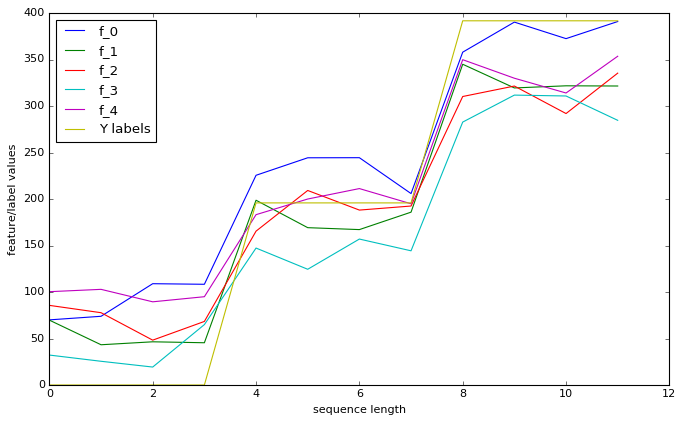

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
from experiment_cont_features import *

def plot_seq_features(seq):
    features_mean = []
    num_features = len(seq.X[1].keys())
    for f in range(num_features):
        f_vals = []
        for i in range(seq.T):
            f_val = float(seq.X[i+1]["f_{}".format(f)])
            f_vals.append(f_val)
        features_mean.append(np.mean(f_vals))
        plt.plot(f_vals, label='f_{}'.format(f))
    # plot the labels -- seq.flat_y attribute is the list of labels of Y
    overall_mean = np.mean(features_mean)
    plt.plot([int(elem)*overall_mean for elem in seq.flat_y], label='Y labels')
    plt.xlabel('sequence length')
    plt.ylabel('feature/label values')
    plt.legend(loc='upper left')

# generate sequences with length = 10  with number of labels = 3 and continuous features tracks = 5
seq_len = 10
num_labels = 3
num_contfeatures_tracks = 5
categfeatures_percentage = 0
# initialize sequence generator
seq_generator = SeqGenerator(seq_len, num_labels, num_contfeatures_tracks, "rescaling", categfeatures_percentage)
# generate 2 sequences
num_seqs = 2
seqs = seq_generator.generate_seqs(num_seqs)
seq = seqs[0]
print(seq)
plot_seq_features(seq)

As it can be seen from the plot above, although the features include random values, they are tied to a range for every label. For example, in the above figure we have <span style="color:red">3</span> labels <span style="color:red">0, 1, 2</span> where each label is associated to a range of values for each of the <span style="color:rgb(34,139,34)
">5</span> features we have. In other words, observations/feature values increase monotonically for every new label assigned to. The labels in the figure were scaled by the mean value of the features for visualization purposes.
<br/>
Below, we generate again another sequences where we increase the number of labels to <span style="color:red">5</span> to further demonstrate the structure of the generated sequences.

Y sequence:
 ['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2', '3', '3', '3', '3', '4', '4', '4', '4']
X sequence:
 {1: {'f_0': '3.7065401249882233', 'f_9': '20.770968702396857', 'f_5': '126.75234558218722', 'f_6': '98.61632023504679', 'f_2': '93.7293781802137', 'f_7': '74.02858577674367', 'f_8': '90.26336516615291', 'f_1': '115.10926960259017', 'f_4': '110.63287382123826', 'f_3': '86.45279449892452'}, 2: {'f_0': '34.788464044446656', 'f_9': '24.65865697644618', 'f_5': '112.7883393383899', 'f_6': '105.85694722020739', 'f_2': '75.78386138518276', 'f_7': '66.48963824829306', 'f_8': '117.61965385336926', 'f_1': '106.18213253092703', 'f_4': '70.06240076766929', 'f_3': '90.68607011520874'}, 3: {'f_0': '37.9498596913712', 'f_9': '41.87034999669127', 'f_5': '93.08711968244054', 'f_6': '109.97978074545495', 'f_2': '76.98104577242961', 'f_7': '56.970247468688704', 'f_8': '79.89108155753703', 'f_1': '96.80209992218282', 'f_4': '105.88319811679212', 'f_3': '58.26408771662992'}, 4: {'f_

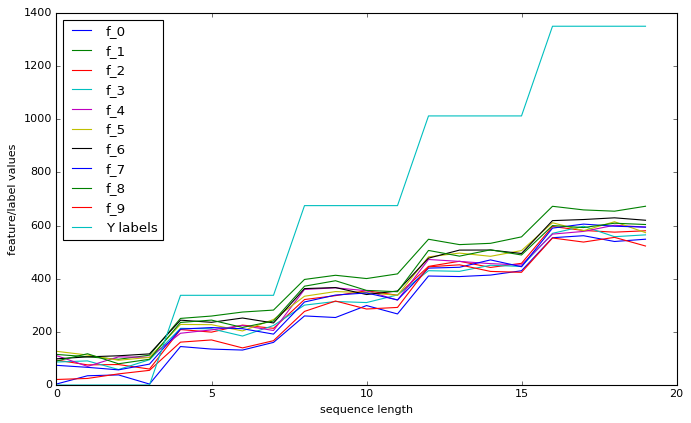

In [3]:
# generate sequences with length = 20, number of labels = 5 and continuous features = 10
# initialize sequence generator
seq_generator = SeqGenerator(20, 5, 10, "rescaling", 0)
# generate a sequence
seqs = seq_generator.generate_seqs(1)
seq = seqs[0]
print(seq)
plot_seq_features(seq)

In the follwing cells, we test the different training methods (1) gradient-based and (2) perceptron/search-based methods
on 5 generated sequences. We also vary the l2 regularization parameter for gradient-based training methods.

# Testing gradient-based training methods

dumping globalfeatures -- processed seqs:  1
dumping globalfeatures -- processed seqs:  2
dumping globalfeatures -- processed seqs:  3
dumping globalfeatures -- processed seqs:  4
dumping globalfeatures -- processed seqs:  5
constructing model -- processed seqs:  1
constructing model -- processed seqs:  2
constructing model -- processed seqs:  3
constructing model -- processed seqs:  4
constructing model -- processed seqs:  5
identifying model active features -- processed seqs:  1
identifying model active features -- processed seqs:  2
identifying model active features -- processed seqs:  3
identifying model active features -- processed seqs:  4
identifying model active features -- processed seqs:  5
evaluating method: SGA, with l2 regularization: 0
training using optimization options:
{'num_epochs': 10, 'regularization_value': 0, 'method': 'SGA', 'regularization_type': 'l2'}
num seqs left: 4
num seqs left: 3
num seqs left: 2
num seqs left: 1
num seqs left: 0
reldiff = 1.0
num seqs lef

/home/aa/anaconda/envs/pyv3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


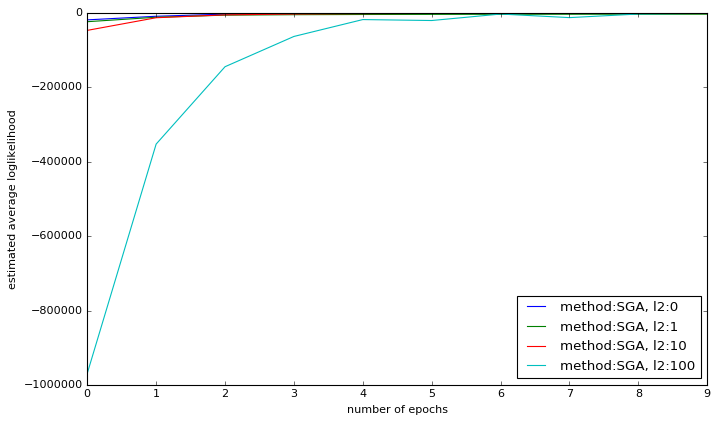

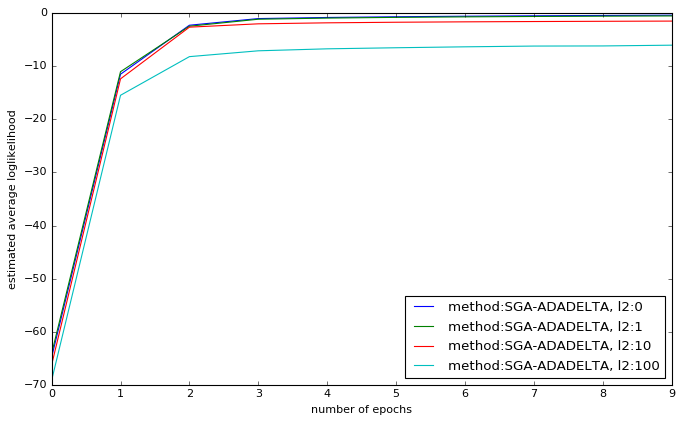

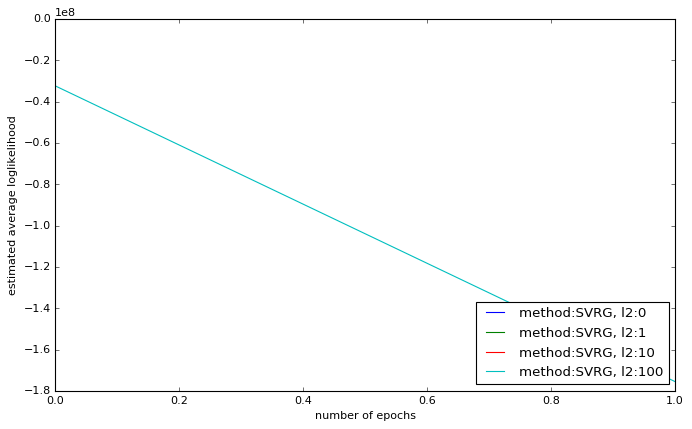

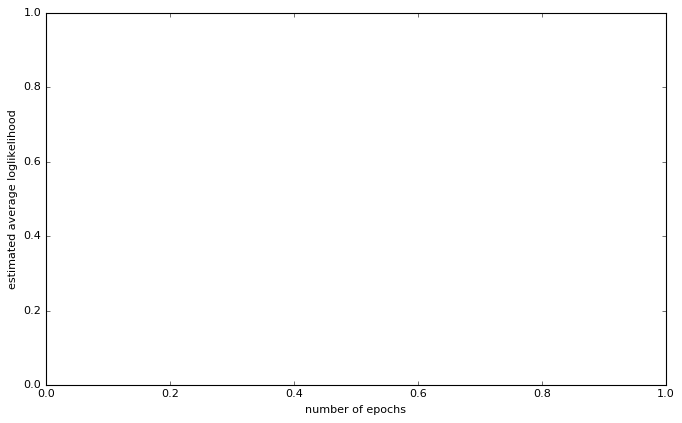

In [5]:
# case of HOCRFAD models
workflow, crf_model, data_split = build_model('HOCRFAD', template_config_2)

# train models using SGA, SGA-ADADELTA, and SVRG methods
optimization_options = {"method" : "",
                        "regularization_type": "l2",
                        "regularization_value":0,
                       }
methods = ('SGA', 'SGA-ADADELTA', 'SVRG', 'L-BFGS-B')
trained_models_dir = {}
train_seqs_id = data_split[0]['train']


for i, method in enumerate(methods):
    plt.figure(i)
    optimization_options['method'] = method
    if(method in {'SGA', 'SGA-ADADELTA'}):
        optimization_options['num_epochs'] = 10
    elif(method == 'SVRG'):
        optimization_options['num_epochs'] = 2
    else:
        del optimization_options['num_epochs']

    for c in (0, 1, 10, 100):
        print("evaluating method: {}, with l2 regularization: {}".format(method, c))
        optimization_options['regularization_value'] = c
        print("training using optimization options:")
        print(optimization_options)
        # make sure we are initializing the weights to be 0
        crf_model.weights.fill(0)
        model_dir = workflow.train_model(train_seqs_id, crf_model, optimization_options)
        print("*"*50)
        if(method != 'L-BFGS-B'):
            avg_ll = ReaderWriter.read_data(os.path.join(model_dir, 'avg_loglikelihood_training'))
            plt.plot(avg_ll[1:], label="method:{}, {}:{}".format(optimization_options['method'], 
                                                             optimization_options['regularization_type'],
                                                             optimization_options['regularization_value']))
        trained_models_dir[method] = model_dir
    plt.legend(loc='lower right')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average loglikelihood')

f = plt.gcf()
del f    

# Testing perceptron-based training methods

evaluating method: COLLINS-PERCEPTRON
dumping globalfeatures -- processed seqs:  1
dumping globalfeatures -- processed seqs:  2
dumping globalfeatures -- processed seqs:  3
dumping globalfeatures -- processed seqs:  4
dumping globalfeatures -- processed seqs:  5
constructing model -- processed seqs:  1
constructing model -- processed seqs:  2
constructing model -- processed seqs:  3
constructing model -- processed seqs:  4
constructing model -- processed seqs:  5
identifying model active features -- processed seqs:  1
identifying model active features -- processed seqs:  2
identifying model active features -- processed seqs:  3
identifying model active features -- processed seqs:  4
identifying model active features -- processed seqs:  5
sequences left 5
in full update routine ...
sequences left 4
in full update routine ...
sequences left 3
in full update routine ...
sequences left 2
in full update routine ...
sequences left 1
in full update routine ...
reldiff = 1.0
average error : [0

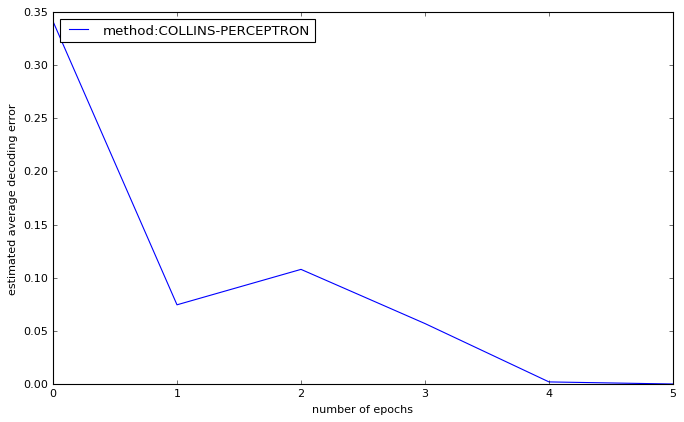

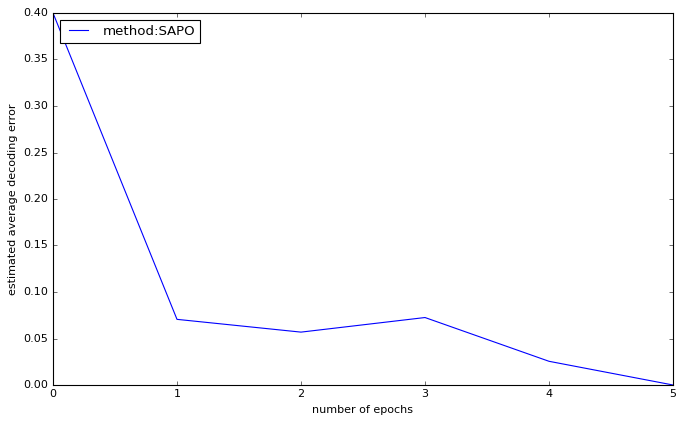

In [15]:
options = ('COLLINS-PERCEPTRON', 'SAPO')
optimization_options = {'method': "",
                        'num_epochs':10,
                        'update_type':'max-fast',
                        'beam_size':-1,
                        'shuffle_seq':False
                        }
for i, method in enumerate(options):
    plt.figure(i)
    print("evaluating method: {}".format(method))
    optimization_options['method'] = method
    model_dir = run_training('HO_AD', trainconfig_3, optimization_options)[0]
    # average decoding error -- this should generally be a decreasing graph 
    avg_dec_error = ReaderWriter.read_data(os.path.join(model_dir, 'avg_decodingerror_training'))
    plt.plot(avg_dec_error[1:], label="method:{}".format(method))
    plt.legend(loc='upper left')
    plt.xlabel('number of epochs')
    plt.ylabel('estimated average decoding error')